<a href="https://colab.research.google.com/github/GaneshKannanOfficial/BitcoinPrice_Prediction/blob/main/BitCoin_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import yfinance as yf

In [3]:
df = yf.download('BTC-USD')

[*********************100%%**********************]  1 of 1 completed


In [4]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2023-09-14,26228.277344,26774.623047,26171.451172,26539.673828,26539.673828,13811359124
2023-09-15,26533.818359,26840.498047,26240.701172,26608.693359,26608.693359,11479735788
2023-09-16,26606.199219,26754.769531,26473.890625,26568.281250,26568.281250,7402031417


In [5]:
import numpy as np,pandas as pd,matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error,mean_absolute_error


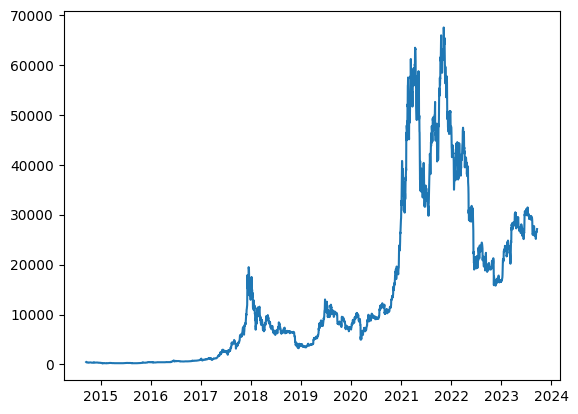

In [6]:
plt.plot(df.index,df['Adj Close'])
plt.show()

In [7]:
#Train test split

row = int(len(df)*0.9)
train_data = list(df[0:row]['Adj Close'])
test_data = list(df[row:]['Adj Close'])

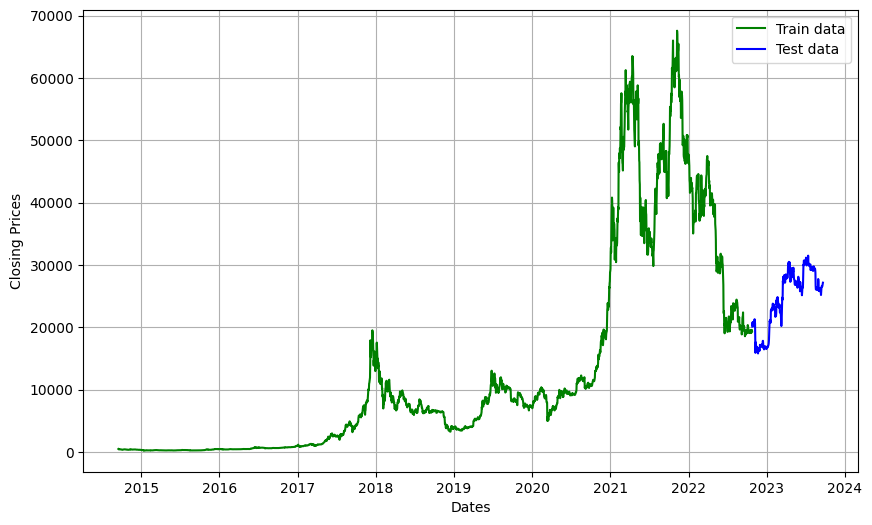

In [8]:
plt.figure(figsize = (10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df.index[0:row],train_data,'green',label='Train data')
plt.plot(df.index[row:],test_data,'blue',label='Test data')
plt.legend()

In [9]:
model_pred = []
n_test = len(test_data)

In [10]:
for i in range(n_test):
  model = ARIMA(train_data,order=(4,1,0))
  model_fit = model.fit()
  out = model_fit.forecast()
  y_pred = out[0]
  model_pred.append(y_pred)
  test_val = test_data[i]
  train_data.append(test_val)

In [11]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3288
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -26552.998
Date:                Wed, 20 Sep 2023   AIC                          53115.996
Time:                        03:40:09   BIC                          53146.484
Sample:                             0   HQIC                         53126.912
                               - 3288                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0250      0.009     -2.754      0.006      -0.043      -0.007
ar.L2          0.0084      0.009      0.960      0.337      -0.009       0.025
ar.L3          0.0198      0.009      2.118      0.0

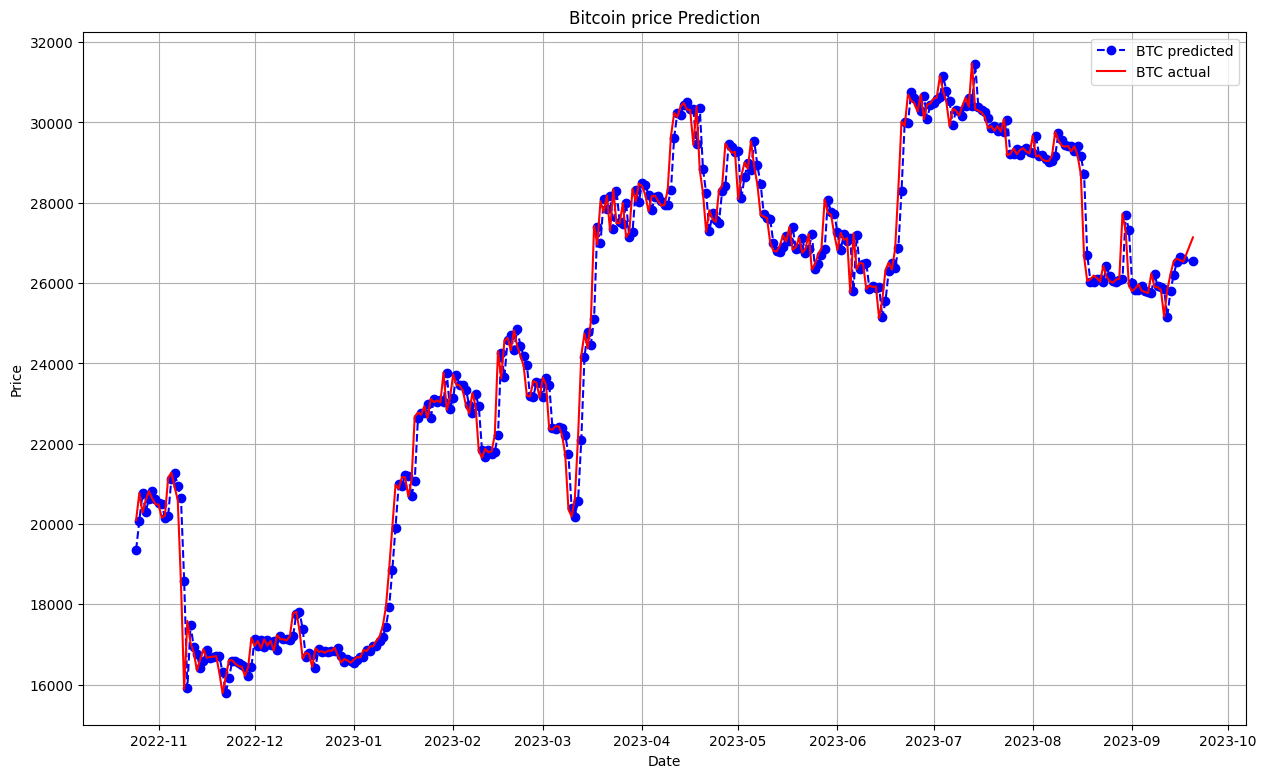

In [12]:
plt.figure(figsize = (15,9))
plt.grid(True)
data_range = df.index[row:]
plt.plot(data_range,model_pred,color='blue',marker='o',linestyle='dashed',label = 'BTC predicted')
plt.plot(data_range,test_data,color='red',label = 'BTC actual')
plt.title('Bitcoin price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [15]:
from sklearn.metrics import mean_absolute_percentage_error
acc = mean_absolute_percentage_error(test_data,model_pred)
(1-acc)*100

98.41208924583854